In [1]:
import numpy as np 
import pandas as pd
import datetime as datetime

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

In [2]:
#Cargamos los datos
events = pd.read_csv('C:\\Users\\dev\\repos\\fiuba\\tp1_anlisis_exploratorio\\events.csv', low_memory = False)

In [3]:
#Cabecera
events.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Resumen
events.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,1011288,1011288,1011288,82756,563838,564284,563836,563836,563836,221699,...,50957,87378,87378,87378,87378,87378,87378,87378,87378,87378
unique,793805,11,27624,227,3574,202,5,8,63,35310,...,4,7,2,1939,93,46,4,282,121,343
top,2018-05-15 15:56:06,viewed product,71492f2b,/,2830.0,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",...,Google,Paid,Returning,Unknown,Sao Paulo,Brazil,Smartphone,360x640,Windows 7,Chrome 66.0
freq,11,528931,2771,28323,4282,50916,243014,190833,132960,594,...,50240,44193,60480,15819,24996,84308,44239,30009,19675,22611


In [5]:
#eventos por persona por tipo
count_eventos_por_persona_por_tipo = events.groupby(['person','event']).agg({'event':'count'})
count_eventos_por_persona_por_tipo.columns=['count']
count_eventos_por_persona_por_tipo.head(10)

count
person   event                 
0004b0a2 ad campaign hit      1
         checkout             1
         viewed product       1
         visited site         1
0006a21a ad campaign hit      1
         checkout             1
         viewed product       1
         visited site         1
000a54b2 ad campaign hit      2
         brand listing        6

In [6]:
count_eventos_por_persona_por_tipo=count_eventos_por_persona_por_tipo.unstack(fill_value=0)
suma=count_eventos_por_persona_por_tipo.sum(axis=1)

In [17]:
porcentuadas = count_eventos_por_persona_por_tipo[count_eventos_por_persona_por_tipo.columns].div(suma,axis=0).multiply(100)
porcentuadas.head(5)

count                                            \
event         ad campaign hit        brand listing             checkout   
person                                                                    
0004b0a2                25.00                 0.00                25.00   
0006a21a                25.00                 0.00                25.00   
000a54b2                 5.41                16.22                 2.70   
00184bf9                 0.00                13.73                 7.84   
0019c395                25.00                 0.00                12.50   

                                                                         \
event              conversion      generic listing                 lead   
person                                                                    
0004b0a2                 0.00                 0.00                 0.00   
0006a21a                 0.00                 0.00                 0.00   
000a54b2                 0.00                13.51                 0.00   
00184bf9                 0.00                 0.00                 0.00   
0019c395                 0.00                 0.00                 0.00   

                                                                         \
event       search engine hit    searched products           staticpage   
person                                                                    
0004b0a2                 0.00                 0.00                 0.00   
0006a21a                 0.00                 0.00                 0.00   
000a54b2                 5.41                 0.00                 0.00   
00184bf9                 3.92                 0.00                 0.00   
0019c395                25.00                 0.00                 0.00   

                                                    
event          viewed product         visited site  
person                                              
0004b0a2                25.00                25.00  
0006a21a                25.00                25.00  
000a54b2                51.35                 5.41  
00184bf9                70.59                 3.92  
0019c395                25.00                12.50

In [23]:
con_suma = count_eventos_por_persona_por_tipo.assign(suma=suma)
con_suma.columns=['ad campaign hit', 'brand listing', 'checkout', 'conversion', 'generic listing', 'lead', 'search engine hit', 'searched products', 'staticpage', 'viewed product', 'visited site','interacciones']
top_users = con_suma.sort_values(by='interacciones',ascending=False).head(10)
top_users

,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site,interacciones
person,,,,,,,,,,,,
71492f2b,61,1149,3,0,71,1,0,15,4,1364,103,2771
6b07be7b,59,780,13,6,424,0,6,87,14,1118,263,2770
285101a1,74,657,7,1,244,0,12,7,0,1077,61,2140
3e34b3cf,4,36,10,0,141,0,0,59,1,1487,139,1877
2d5a84c1,61,50,3,0,7,0,6,6,0,1525,142,1800
5f25cb5d,53,542,3,2,281,1,37,14,32,681,151,1797
5af7e2bc,220,627,4,2,2,1,2,23,7,728,157,1773
3b5a5833,33,6,20,0,67,2,25,0,1,1383,168,1705
d7e60792,7,28,1,0,12,0,8,1,3,1212,80,1352


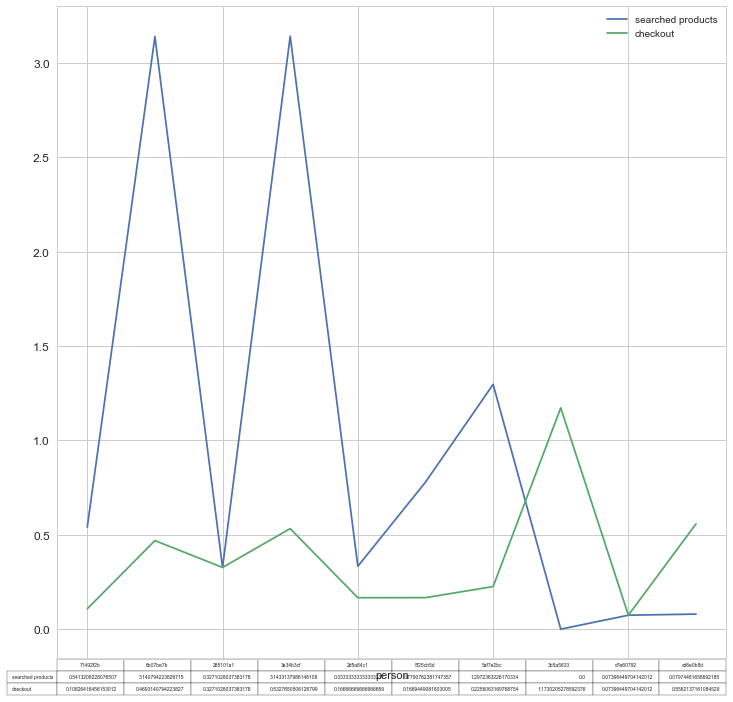

In [20]:
#graficos
columnas=['searched products','checkout']
g = top_users[columnas].plot.line(figsize=(12,12),fontsize=12,table=True)

In [ ]:
#podria armar una tabla con los mismos campos pero los porcentajes del total para cada uno
#podria buscar cuantas personas tienen un x nivel de interacciones, para cada categoria
#podria ver si el comportamiento de la persona depende de la cantidad de interacciones de la misma, para cada campo (quizas alguno es independiente)


In [22]:
#ordenado por checkout
top_checkout = con_suma.sort_values(by='checkout',ascending=False).head(10)
top_checkout

,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site,interacciones
person,,,,,,,,,,,,
bf8b07aa,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
4dfd102a,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
21373f60,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
caea4dc3,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
4ce14878,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
4ce1d74f,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
2129114c,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
4d0a2de2,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
ca5a2f18,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [ ]:
g = top_checkout.plot.line(figsize=(12,12),fontsize=12,table=True)

In [ ]:
#ordenado por conversion
con_suma.sort_values(by='conversion',ascending=False).head(10)

In [ ]:
#ordenado por viewed product
con_suma.sort_values(by='viewed product',ascending=False).head(10)